## This script reads CESM2 Discharge data downloaded from Casper in NCAR (Figure S2)

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import datetime

import xarray as xr
import seaborn as sns
import warnings
from matplotlib import pyplot as plt 


## Read Lat, Lon data for the selected Domain processed from "GLADE" in Casper

### Lat

In [2]:
file_LatUs = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/discharge/mon/latsUsArr.npy'
#file_LatUs = 'https://github.com/rezaulg/CESM2-projection-Mississippi-discharge/blob/main/latsUsArr.npy'

lats_US = np.load(file_LatUs)
print(lats_US.shape)
print(lats_US)

(60,)
[24.75 25.25 25.75 26.25 26.75 27.25 27.75 28.25 28.75 29.25 29.75 30.25
 30.75 31.25 31.75 32.25 32.75 33.25 33.75 34.25 34.75 35.25 35.75 36.25
 36.75 37.25 37.75 38.25 38.75 39.25 39.75 40.25 40.75 41.25 41.75 42.25
 42.75 43.25 43.75 44.25 44.75 45.25 45.75 46.25 46.75 47.25 47.75 48.25
 48.75 49.25 49.75 50.25 50.75 51.25 51.75 52.25 52.75 53.25 53.75 54.25]


### Lon

In [3]:
file_LonUs = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/discharge/mon/lonsUsArr.npy'
lons_US = np.load(file_LonUs)
print(lons_US.shape)
print(lons_US)

(140,)
[-130.25 -129.75 -129.25 -128.75 -128.25 -127.75 -127.25 -126.75 -126.25
 -125.75 -125.25 -124.75 -124.25 -123.75 -123.25 -122.75 -122.25 -121.75
 -121.25 -120.75 -120.25 -119.75 -119.25 -118.75 -118.25 -117.75 -117.25
 -116.75 -116.25 -115.75 -115.25 -114.75 -114.25 -113.75 -113.25 -112.75
 -112.25 -111.75 -111.25 -110.75 -110.25 -109.75 -109.25 -108.75 -108.25
 -107.75 -107.25 -106.75 -106.25 -105.75 -105.25 -104.75 -104.25 -103.75
 -103.25 -102.75 -102.25 -101.75 -101.25 -100.75 -100.25  -99.75  -99.25
  -98.75  -98.25  -97.75  -97.25  -96.75  -96.25  -95.75  -95.25  -94.75
  -94.25  -93.75  -93.25  -92.75  -92.25  -91.75  -91.25  -90.75  -90.25
  -89.75  -89.25  -88.75  -88.25  -87.75  -87.25  -86.75  -86.25  -85.75
  -85.25  -84.75  -84.25  -83.75  -83.25  -82.75  -82.25  -81.75  -81.25
  -80.75  -80.25  -79.75  -79.25  -78.75  -78.25  -77.75  -77.25  -76.75
  -76.25  -75.75  -75.25  -74.75  -74.25  -73.75  -73.25  -72.75  -72.25
  -71.75  -71.25  -70.75  -70.25  -69.75  -6

## Historical years and 3 time periods (i.e., Era) in Scenario years

In [4]:
histYrSelSt = 1930

refPeriodYrSt = 1971
refPeriodYrEnd = 2000

scenYrSt = 2015
scenEraTwoYrSt = 2045
scenEraThreeYrSt = 2075

scenYrEnd = 2100
#

In [5]:
nYrsHistSelScen = scenYrEnd - histYrSelSt + 1
print(nYrsHistSelScen)

171


In [6]:
nMonsPerYr = 12     
print(nMonsPerYr)

12


## Reference Period

In [7]:
refPeriodStepSt = (refPeriodYrSt - histYrSelSt)*1
refPeriodStepEnd = (refPeriodYrEnd - histYrSelSt + 1)*1
print(refPeriodStepSt, refPeriodStepEnd)
print(refPeriodStepEnd-refPeriodStepSt)

41 71
30


## Era1

In [8]:
scenEraOneStepSt = (scenYrSt - histYrSelSt)*1
scenEraOneStepEnd = (scenEraTwoYrSt - histYrSelSt)*1
print(scenEraOneStepSt, scenEraOneStepEnd)
print(scenEraOneStepEnd-scenEraOneStepSt)

85 115
30


## Era2

In [9]:
scenEraTwoStepSt = (scenEraTwoYrSt - histYrSelSt)*1
scenEraTwoStepEnd = (scenEraThreeYrSt - histYrSelSt)*1

print(scenEraTwoStepSt, scenEraTwoStepEnd)
print(scenEraTwoStepEnd-scenEraTwoStepSt)

115 145
30


## Era3

In [10]:
scenEraThreeStepSt = (scenEraThreeYrSt - histYrSelSt)*1
scenEraThreeStepEnd = (scenYrEnd - histYrSelSt + 1)*1
print(scenEraThreeStepSt, scenEraThreeStepEnd)
print(scenEraThreeStepEnd-scenEraThreeStepSt)

145 171
26


## Formatting X-axis ticks for plotting purpose

In [11]:
histYrSelSt = 1930
scenYrEnd = 2100

timeList = []
for yr in range(histYrSelSt, scenYrEnd+1):  
    
    yMD = datetime.datetime(yr,1,1)    
    timeList.append(yMD)                   
                        
timeListDf = pd.DataFrame(timeList)

timeListDf.columns = ['t1']
timeListDf


,t1
0,1930-01-01
1,1931-01-01
2,1932-01-01
3,1933-01-01
4,1934-01-01
...,...
166,2096-01-01
167,2097-01-01
168,2098-01-01
169,2099-01-01


In [12]:
yMD = timeListDf['t1'].dt.strftime('%Y').sort_values()
multiple = 20

multiple = np.ceil(multiple)
timeTickLebels = yMD[yMD.index % multiple == 0]
timeTicks = yMD.index[yMD.index % multiple == 0]
timeTicks


Int64Index([0, 20, 40, 60, 80, 100, 120, 140, 160], dtype='int64')

In [13]:
print(timeTicks.shape)
print(timeTickLebels)

(9,)
0      1930
20     1950
40     1970
60     1990
80     2010
100    2030
120    2050
140    2070
160    2090
Name: t1, dtype: object


## Color for plotting

In [14]:
width = 0.5  # the width of the bars

my_colors = ["green", "blue", 
             "orange", "red"]
sns.set_palette( my_colors )

## Using Monthly Data (HistSel + Scen) for the US domain from Ensemble Members

In [15]:
file_histSel_Us_ensMean = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/discharge/mon/monDischUsHistSelEnsMean.npy'
file_histSel_Us_ensMean_loaded = np.load(file_histSel_Us_ensMean)
print(file_histSel_Us_ensMean_loaded.shape)
maxVal = np.nanmax(file_histSel_Us_ensMean_loaded)
maxVal

(1020, 60, 140)


1.0000000000000002e+36

In [16]:
file_scen_Us_ensMean = 'C:/rezaul/1.academic/1.research/2.project/mrb/dt/cesm/cesm2LE/param/discharge/mon/monDischUsScenEnsMean.npy'
file_scen_Us_ensMean_loaded = np.load(file_scen_Us_ensMean)
print(file_scen_Us_ensMean_loaded.shape)
maxVal = np.nanmax(file_scen_Us_ensMean_loaded)
maxVal

(1032, 60, 140)


1.0000000000000002e+36

## Concatenate two data arrays

In [17]:
disch_histSel_scen_Us_ensMean = np.concatenate((file_histSel_Us_ensMean_loaded, file_scen_Us_ensMean_loaded), axis=0)
print(disch_histSel_scen_Us_ensMean.shape)

(2052, 60, 140)


## Extracting discharge values at different outlet points 

### Coordinates

In [18]:
# Missouri at Hermann
latTrgt_MissouriHermann = 38.71
lonTrgt_MissouriHermann = -91.44

# Arkansas at Murray Dam near Little Rock
latTrgt_ArkansasMurrayLittleRock = 34.79
lonTrgt_ArkansasMurrayLittleRock = -92.36

# Ohio at Olmsted
latTrgt_OhioOlmsted = 37.18
lonTrgt_OhioOlmsted = -89.06

# Mississippi at Vicksburg
latTrgt_MissiVicks = 32.32
lonTrgt_MissiVicks = -90.91


In [19]:
# Missouri at Hermann
latTrgtIndex_MissouriHermann = np.argmin( np.abs(lats_US - latTrgt_MissouriHermann))
lonTrgtIndex_MissouriHermann = np.argmin( np.abs(lons_US - lonTrgt_MissouriHermann))
print(latTrgtIndex_MissouriHermann, lonTrgtIndex_MissouriHermann)

# Arkansas at Murray Dam near Little Rock
latTrgtIndex_ArkansasMurrayLittleRock = np.argmin( np.abs(lats_US - latTrgt_ArkansasMurrayLittleRock))
lonTrgtIndex_ArkansasMurrayLittleRock = np.argmin( np.abs(lons_US - lonTrgt_ArkansasMurrayLittleRock))
print(latTrgtIndex_ArkansasMurrayLittleRock, lonTrgtIndex_ArkansasMurrayLittleRock)

# Ohio at Olmsted
latTrgtIndex_OhioOlmsted = np.argmin( np.abs(lats_US - latTrgt_OhioOlmsted))
lonTrgtIndex_OhioOlmsted = np.argmin( np.abs(lons_US - lonTrgt_OhioOlmsted))
print(latTrgtIndex_OhioOlmsted, lonTrgtIndex_OhioOlmsted)

# Mississippi at Vicksburg
latTrgtIndex_MissiVicks = np.argmin( np.abs(lats_US - latTrgt_MissiVicks))
lonTrgtIndex_MissiVicks = np.argmin( np.abs(lons_US - lonTrgt_MissiVicks))
print(latTrgtIndex_MissiVicks, lonTrgtIndex_MissiVicks)


28 78
20 76
25 82
15 79


## Missouri at Hermann

In [20]:
disch_histSel_scen_ensMean_MissouriHermann = disch_histSel_scen_Us_ensMean[:, latTrgtIndex_MissouriHermann, lonTrgtIndex_MissouriHermann]
print(disch_histSel_scen_ensMean_MissouriHermann.shape)

disch_histSel_scen_ensMean_Yr_MissouriHermann = np.reshape(disch_histSel_scen_ensMean_MissouriHermann,(nYrsHistSelScen, nMonsPerYr))
print(disch_histSel_scen_ensMean_Yr_MissouriHermann.shape)

disch_yrMean_histSel_scen_ensMean_MissouriHermannArr = np.nanmean(disch_histSel_scen_ensMean_Yr_MissouriHermann, axis = 1)
print(disch_yrMean_histSel_scen_ensMean_MissouriHermannArr.shape)


(2052,)
(171, 12)
(171,)


### Sub-setting the time series into historical reference and 3 time periods in the 21st century

In [21]:
disch_yrMean_refPeriod_ensMean_MissouriHermannArr = disch_yrMean_histSel_scen_ensMean_MissouriHermannArr[refPeriodStepSt:refPeriodStepEnd]
print(disch_yrMean_refPeriod_ensMean_MissouriHermannArr.shape)

disch_yrMean_eraOne_ensMean_MissouriHermannArr = disch_yrMean_histSel_scen_ensMean_MissouriHermannArr[scenEraOneStepSt:scenEraOneStepEnd]
print(disch_yrMean_eraOne_ensMean_MissouriHermannArr.shape)

disch_yrMean_eraTwo_ensMean_MissouriHermannArr = disch_yrMean_histSel_scen_ensMean_MissouriHermannArr[scenEraTwoStepSt:scenEraTwoStepEnd]
print(disch_yrMean_eraTwo_ensMean_MissouriHermannArr.shape)

disch_yrMean_eraThree_ensMean_MissouriHermannArr = disch_yrMean_histSel_scen_ensMean_MissouriHermannArr[scenEraThreeStepSt:scenEraThreeStepEnd]
print(disch_yrMean_eraThree_ensMean_MissouriHermannArr.shape)

(30,)
(30,)
(30,)
(26,)


### Percent change calculation

In [22]:

disch_yrMean_refPeriodMean_ensMean_MissouriHermannArr = np.nanmean(disch_yrMean_refPeriod_ensMean_MissouriHermannArr)
print(disch_yrMean_refPeriodMean_ensMean_MissouriHermannArr)
print('')

disch_yrMeanPercCh_histSel_scen_ensMean_MissouriHermannArr = (disch_yrMean_histSel_scen_ensMean_MissouriHermannArr - disch_yrMean_refPeriodMean_ensMean_MissouriHermannArr)/disch_yrMean_refPeriodMean_ensMean_MissouriHermannArr*100
print(disch_yrMeanPercCh_histSel_scen_ensMean_MissouriHermannArr.shape)
print('')

disch_yrMeanPercCh_eraOne_ensMean_MissouriHermannArr = disch_yrMeanPercCh_histSel_scen_ensMean_MissouriHermannArr[scenEraOneStepSt:scenEraOneStepEnd]
print(disch_yrMeanPercCh_eraOne_ensMean_MissouriHermannArr.shape)

disch_yrMeanPercCh_eraTwo_ensMean_MissouriHermannArr = disch_yrMeanPercCh_histSel_scen_ensMean_MissouriHermannArr[scenEraTwoStepSt:scenEraTwoStepEnd]
print(disch_yrMeanPercCh_eraTwo_ensMean_MissouriHermannArr.shape)

disch_yrMeanPercCh_eraThree_ensMean_MissouriHermannArr = disch_yrMeanPercCh_histSel_scen_ensMean_MissouriHermannArr[scenEraThreeStepSt:scenEraThreeStepEnd]
print(disch_yrMeanPercCh_eraThree_ensMean_MissouriHermannArr.shape)

4269.254595404186

(171,)

(30,)
(30,)
(26,)


## Arkansas at Murray Dam near Little Rock

In [23]:
disch_histSel_scen_ensMean_ArkansasMurrayLittleRock = disch_histSel_scen_Us_ensMean[:, latTrgtIndex_ArkansasMurrayLittleRock, lonTrgtIndex_ArkansasMurrayLittleRock]
print(disch_histSel_scen_ensMean_ArkansasMurrayLittleRock.shape)

disch_histSel_scen_ensMean_Yr_ArkansasMurrayLittleRock = np.reshape(disch_histSel_scen_ensMean_ArkansasMurrayLittleRock,(nYrsHistSelScen, nMonsPerYr))
print(disch_histSel_scen_ensMean_Yr_ArkansasMurrayLittleRock.shape)

disch_yrMean_histSel_scen_ensMean_ArkansasMurrayLittleRockArr = np.nanmean(disch_histSel_scen_ensMean_Yr_ArkansasMurrayLittleRock, axis = 1)
print(disch_yrMean_histSel_scen_ensMean_ArkansasMurrayLittleRockArr.shape)


(2052,)
(171, 12)
(171,)


### Sub-setting the time series into historical reference and 3 time periods in the 21st century

In [24]:
disch_yrMean_refPeriod_ensMean_ArkansasMurrayLittleRockArr = disch_yrMean_histSel_scen_ensMean_ArkansasMurrayLittleRockArr[refPeriodStepSt:refPeriodStepEnd]
print(disch_yrMean_refPeriod_ensMean_ArkansasMurrayLittleRockArr.shape)

disch_yrMean_eraOne_ensMean_ArkansasMurrayLittleRockArr = disch_yrMean_histSel_scen_ensMean_ArkansasMurrayLittleRockArr[scenEraOneStepSt:scenEraOneStepEnd]
print(disch_yrMean_eraOne_ensMean_ArkansasMurrayLittleRockArr.shape)

disch_yrMean_eraTwo_ensMean_ArkansasMurrayLittleRockArr = disch_yrMean_histSel_scen_ensMean_ArkansasMurrayLittleRockArr[scenEraTwoStepSt:scenEraTwoStepEnd]
print(disch_yrMean_eraTwo_ensMean_ArkansasMurrayLittleRockArr.shape)

disch_yrMean_eraThree_ensMean_ArkansasMurrayLittleRockArr = disch_yrMean_histSel_scen_ensMean_ArkansasMurrayLittleRockArr[scenEraThreeStepSt:scenEraThreeStepEnd]
print(disch_yrMean_eraThree_ensMean_ArkansasMurrayLittleRockArr.shape)

(30,)
(30,)
(30,)
(26,)


### Percent change calculation

In [25]:
disch_yrMean_refPeriodMean_ensMean_ArkansasMurrayLittleRockArr = np.nanmean(disch_yrMean_refPeriod_ensMean_ArkansasMurrayLittleRockArr)
print(disch_yrMean_refPeriodMean_ensMean_ArkansasMurrayLittleRockArr)
print('')

disch_yrMeanPercCh_histSel_scen_ensMean_ArkansasMurrayLittleRockArr = (disch_yrMean_histSel_scen_ensMean_ArkansasMurrayLittleRockArr - disch_yrMean_refPeriodMean_ensMean_ArkansasMurrayLittleRockArr)/disch_yrMean_refPeriodMean_ensMean_ArkansasMurrayLittleRockArr*100
print(disch_yrMeanPercCh_histSel_scen_ensMean_ArkansasMurrayLittleRockArr.shape)
print('')

disch_yrMeanPercCh_eraOne_ensMean_ArkansasMurrayLittleRockArr = disch_yrMeanPercCh_histSel_scen_ensMean_ArkansasMurrayLittleRockArr[scenEraOneStepSt:scenEraOneStepEnd]
print(disch_yrMeanPercCh_eraOne_ensMean_ArkansasMurrayLittleRockArr.shape)

disch_yrMeanPercCh_eraTwo_ensMean_ArkansasMurrayLittleRockArr = disch_yrMeanPercCh_histSel_scen_ensMean_ArkansasMurrayLittleRockArr[scenEraTwoStepSt:scenEraTwoStepEnd]
print(disch_yrMeanPercCh_eraTwo_ensMean_ArkansasMurrayLittleRockArr.shape)

disch_yrMeanPercCh_eraThree_ensMean_ArkansasMurrayLittleRockArr = disch_yrMeanPercCh_histSel_scen_ensMean_ArkansasMurrayLittleRockArr[scenEraThreeStepSt:scenEraThreeStepEnd]
print(disch_yrMeanPercCh_eraThree_ensMean_ArkansasMurrayLittleRockArr.shape)

1798.0349709062723

(171,)

(30,)
(30,)
(26,)


## Ohio River at Olmsted

In [26]:
disch_histSel_scen_ensMean_OhioOlmsted = disch_histSel_scen_Us_ensMean[:, latTrgtIndex_OhioOlmsted, lonTrgtIndex_OhioOlmsted]
print(disch_histSel_scen_ensMean_OhioOlmsted.shape)

disch_histSel_scen_ensMean_Yr_OhioOlmsted = np.reshape(disch_histSel_scen_ensMean_OhioOlmsted,(nYrsHistSelScen, nMonsPerYr))
print(disch_histSel_scen_ensMean_Yr_OhioOlmsted.shape)

disch_yrMean_histSel_scen_ensMean_OhioOlmstedArr = np.nanmean(disch_histSel_scen_ensMean_Yr_OhioOlmsted, axis = 1)
print(disch_yrMean_histSel_scen_ensMean_OhioOlmstedArr.shape)


(2052,)
(171, 12)
(171,)


### Sub-setting the time series into historical reference and 3 time periods in the 21st century

In [27]:
disch_yrMean_refPeriod_ensMean_OhioOlmstedArr = disch_yrMean_histSel_scen_ensMean_OhioOlmstedArr[refPeriodStepSt:refPeriodStepEnd]
print(disch_yrMean_refPeriod_ensMean_OhioOlmstedArr.shape)

disch_yrMean_eraOne_ensMean_OhioOlmstedArr = disch_yrMean_histSel_scen_ensMean_OhioOlmstedArr[scenEraOneStepSt:scenEraOneStepEnd]
print(disch_yrMean_eraOne_ensMean_OhioOlmstedArr.shape)

disch_yrMean_eraTwo_ensMean_OhioOlmstedArr = disch_yrMean_histSel_scen_ensMean_OhioOlmstedArr[scenEraTwoStepSt:scenEraTwoStepEnd]
print(disch_yrMean_eraTwo_ensMean_OhioOlmstedArr.shape)

disch_yrMean_eraThree_ensMean_OhioOlmstedArr = disch_yrMean_histSel_scen_ensMean_OhioOlmstedArr[scenEraThreeStepSt:scenEraThreeStepEnd]
print(disch_yrMean_eraThree_ensMean_OhioOlmstedArr.shape)

(30,)
(30,)
(30,)
(26,)


### Percent change calculation

In [28]:
disch_yrMean_refPeriodMean_ensMean_OhioOlmstedArr = np.nanmean(disch_yrMean_refPeriod_ensMean_OhioOlmstedArr)
print(disch_yrMean_refPeriodMean_ensMean_OhioOlmstedArr)
print('')

disch_yrMeanPercCh_histSel_scen_ensMean_OhioOlmstedArr = (disch_yrMean_histSel_scen_ensMean_OhioOlmstedArr - disch_yrMean_refPeriodMean_ensMean_OhioOlmstedArr)/disch_yrMean_refPeriodMean_ensMean_OhioOlmstedArr*100
print(disch_yrMeanPercCh_histSel_scen_ensMean_OhioOlmstedArr.shape)
print('')

disch_yrMeanPercCh_eraOne_ensMean_OhioOlmstedArr = disch_yrMeanPercCh_histSel_scen_ensMean_OhioOlmstedArr[scenEraOneStepSt:scenEraOneStepEnd]
print(disch_yrMeanPercCh_eraOne_ensMean_OhioOlmstedArr.shape)

disch_yrMeanPercCh_eraTwo_ensMean_OhioOlmstedArr = disch_yrMeanPercCh_histSel_scen_ensMean_OhioOlmstedArr[scenEraTwoStepSt:scenEraTwoStepEnd]
print(disch_yrMeanPercCh_eraTwo_ensMean_OhioOlmstedArr.shape)

disch_yrMeanPercCh_eraThree_ensMean_OhioOlmstedArr = disch_yrMeanPercCh_histSel_scen_ensMean_OhioOlmstedArr[scenEraThreeStepSt:scenEraThreeStepEnd]
print(disch_yrMeanPercCh_eraThree_ensMean_OhioOlmstedArr.shape)

7890.239422232165

(171,)

(30,)
(30,)
(26,)


## Mississippi at Vicksburg

In [29]:
disch_histSel_scen_ensMean_MissiVicks = disch_histSel_scen_Us_ensMean[:, latTrgtIndex_MissiVicks, lonTrgtIndex_MissiVicks]
print(disch_histSel_scen_ensMean_MissiVicks.shape)

disch_histSel_scen_ensMean_Yr_MissiVicks=np.reshape(disch_histSel_scen_ensMean_MissiVicks,(nYrsHistSelScen, nMonsPerYr))
print(disch_histSel_scen_ensMean_Yr_MissiVicks.shape)

disch_yrMean_histSel_scen_ensMean_MissiVicksArr = np.nanmean(disch_histSel_scen_ensMean_Yr_MissiVicks, axis = 1)
print(disch_yrMean_histSel_scen_ensMean_MissiVicksArr.shape)

(2052,)
(171, 12)
(171,)


### Sub-setting the time series into historical reference and 3 time periods in the 21st century

In [30]:
disch_yrMean_refPeriod_ensMean_MissiVicksArr = disch_yrMean_histSel_scen_ensMean_MissiVicksArr[refPeriodStepSt:refPeriodStepEnd]
print(disch_yrMean_refPeriod_ensMean_MissiVicksArr.shape)

disch_yrMean_eraOne_ensMean_MissiVicksArr = disch_yrMean_histSel_scen_ensMean_MissiVicksArr[scenEraOneStepSt:scenEraOneStepEnd]
print(disch_yrMean_eraOne_ensMean_MissiVicksArr.shape)

disch_yrMean_eraTwo_ensMean_MissiVicksArr = disch_yrMean_histSel_scen_ensMean_MissiVicksArr[scenEraTwoStepSt:scenEraTwoStepEnd]
print(disch_yrMean_eraTwo_ensMean_MissiVicksArr.shape)

disch_yrMean_eraThree_ensMean_MissiVicksArr = disch_yrMean_histSel_scen_ensMean_MissiVicksArr[scenEraThreeStepSt:scenEraThreeStepEnd]
print(disch_yrMean_eraThree_ensMean_MissiVicksArr.shape)

(30,)
(30,)
(30,)
(26,)


### Percent change calculation

In [31]:
disch_yrMean_refPeriodMean_ensMean_MissiVicksArr = np.nanmean(disch_yrMean_refPeriod_ensMean_MissiVicksArr)
print(disch_yrMean_refPeriodMean_ensMean_MissiVicksArr)
print('')

disch_yrMeanPercCh_histSel_scen_ensMean_MissiVicksArr = (disch_yrMean_histSel_scen_ensMean_MissiVicksArr - disch_yrMean_refPeriodMean_ensMean_MissiVicksArr)/disch_yrMean_refPeriodMean_ensMean_MissiVicksArr*100
print(disch_yrMeanPercCh_histSel_scen_ensMean_MissiVicksArr.shape)
print('')

disch_yrMeanPercCh_eraOne_ensMean_MissiVicksArr = disch_yrMeanPercCh_histSel_scen_ensMean_MissiVicksArr[scenEraOneStepSt:scenEraOneStepEnd]
print(disch_yrMeanPercCh_eraOne_ensMean_MissiVicksArr.shape)

disch_yrMeanPercCh_eraTwo_ensMean_MissiVicksArr = disch_yrMeanPercCh_histSel_scen_ensMean_MissiVicksArr[scenEraTwoStepSt:scenEraTwoStepEnd]
print(disch_yrMeanPercCh_eraTwo_ensMean_MissiVicksArr.shape)

disch_yrMeanPercCh_eraThree_ensMean_MissiVicksArr = disch_yrMeanPercCh_histSel_scen_ensMean_MissiVicksArr[scenEraThreeStepSt:scenEraThreeStepEnd]
print(disch_yrMeanPercCh_eraThree_ensMean_MissiVicksArr.shape)


22716.041475665006

(171,)

(30,)
(30,)
(26,)


## Partitioning wrt Max discharge

In [32]:
print(disch_yrMean_histSel_scen_ensMean_MissiVicksArr.shape)

(171,)


In [33]:
maxDischVicks = np.nanmax(disch_yrMean_histSel_scen_ensMean_MissiVicksArr)
print(maxDischVicks)

26588.07713656241


In [34]:

disch_yrMean_histSel_scen_ensMean_rel_MissouriHermannArr = disch_yrMean_histSel_scen_ensMean_MissouriHermannArr/maxDischVicks
disch_yrMean_histSel_scen_ensMean_rel_ArkansasMurrayLittleRockArr = disch_yrMean_histSel_scen_ensMean_ArkansasMurrayLittleRockArr/maxDischVicks
disch_yrMean_histSel_scen_ensMean_rel_OhioOlmstedArr = disch_yrMean_histSel_scen_ensMean_OhioOlmstedArr/maxDischVicks
disch_yrMean_histSel_scen_ensMean_rel_MissiVicksArr = disch_yrMean_histSel_scen_ensMean_MissiVicksArr/maxDischVicks


<ipython-input-35-0f640efa1fa9>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.xaxis.set_major_formatter(plt.FixedFormatter(yMD))
<ipython-input-35-0f640efa1fa9>:48: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.xaxis.set_major_formatter(plt.FixedFormatter(yMD))


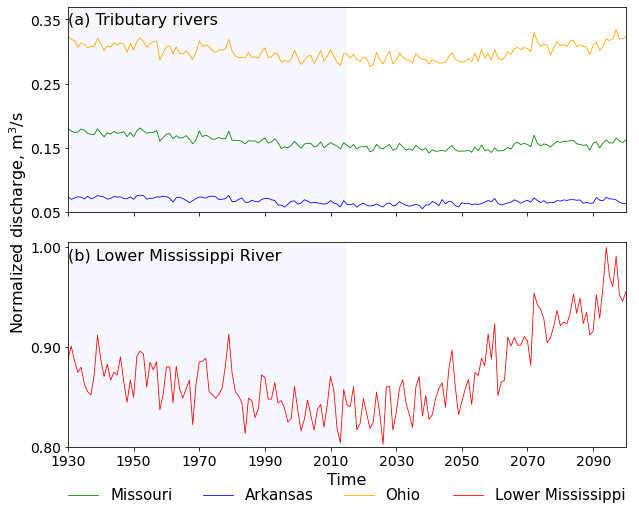

In [35]:
#%matplotlib notebook

tickFontSize = 14
textFontSize = 16
legendFontSize = 15
titleFontSize = 16
linewidth = 0.8
dashLinewidth = 0.7

#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

fig = plt.figure(figsize=(10, 9), constrained_layout=False)

axs = [plt.subplot(2, 1, x + 1,) for x in range(2)]

ax1 = axs[0]

ln11=ax1.plot(range(171), disch_yrMean_histSel_scen_ensMean_rel_MissouriHermannArr, label="Missouri", color = 'green', linestyle='-', linewidth=linewidth)
ln12=ax1.plot(range(171), disch_yrMean_histSel_scen_ensMean_rel_ArkansasMurrayLittleRockArr, label="Arkansas", color = 'blue', linestyle='-', linewidth=linewidth)
ln13=ax1.plot(range(171), disch_yrMean_histSel_scen_ensMean_rel_OhioOlmstedArr, label="Ohio", color = 'orange', linestyle='-', linewidth=linewidth)
ln14=ax1.axvspan(1, 84.5, color='b',alpha=0.03)

ax1.set_title('(a) Tributary rivers', y= 0.98, pad=-14, fontsize = titleFontSize, loc='left')

ax1.xaxis.set_major_formatter(plt.FixedFormatter(yMD))
ax1.set_xticks(timeTicks)
ax1.set_xticklabels(timeTickLebels, minor=False, fontsize=tickFontSize, rotation=0)
ax1.set_xticklabels('', )

ax1.set_yticks([0.05, 0.15, 0.25, 0.35],)
ax1.set_yticklabels(['0.05', '0.15', '0.25', '0.35'],fontsize=tickFontSize)

ax1.set_xlim([0, 170])
ax1.set_ylim([0.05, 0.37])

ax1.legend(ncol=3, loc=(-0.01, -1.45),frameon=False, fontsize=legendFontSize)
ax1.set_ylabel('Normalized discharge, $\mathregular{m^{3}}$/s', fontsize=textFontSize)
ax1.yaxis.set_label_coords(-0.07, -0.05)
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


ax2 = axs[1]
ln21=ax2.plot(range(171), disch_yrMean_histSel_scen_ensMean_rel_MissiVicksArr, label="Lower Mississippi", color = 'red', linestyle='-', linewidth=linewidth)
ln22=ax2.axvspan(1, 84.5, color='b',alpha=0.03)

ax2.set_title('(b) Lower Mississippi River', y= 0.98, pad=-14, fontsize = titleFontSize, loc='left')

ax2.xaxis.set_major_formatter(plt.FixedFormatter(yMD))
ax2.set_xticks(timeTicks, )
ax2.set_xticklabels(timeTickLebels, minor=False, rotation=0, fontsize=tickFontSize)

ax2.set_yticks([0.8, 0.9, 1.0, ],)
ax2.set_yticklabels(['0.80', '0.90', '1.00',],fontsize=tickFontSize)


ax2.set_xlim([0, 170])
ax2.set_ylim([0.8, 1.005])
ax2.set_xlabel('Time', fontsize=textFontSize)
ax2.legend(ncol=1, loc=(+0.68, -0.3),frameon=False, fontsize=legendFontSize)

plt.subplots_adjust(hspace=0.15, bottom=0.2)

#plt.savefig(r'C:\rezaul\1.academic\1.research\2.project\mrb\output\fig\paperOne\param\disch\partition\dischPartitionTs.pdf') 
#plt.savefig(r'C:\rezaul\1.academic\1.research\2.project\mrb\output\fig\paperOne\param\disch\partition\dischPartitionTs.png', dpi=1200)  

plt.show()

In [36]:
STOP here

SyntaxError: invalid syntax (<ipython-input-36-753fd59e218f>, line 1)